# Importing Libraries and Loading Data

In [1]:
#Import libraries relevent to dataframes and plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
# load data
rbd = pd.read_excel('realistic_biological_data.xlsx')
abd = pd.read_excel('additional_biological_data.xlsx')

In [2]:
# checking original data builds
rbd.info()
print('*************************************************')
abd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample ID                      20 non-null     object 
 1   Protein Concentration (mg/ml)  20 non-null     float64
 2   Enzyme Activity (units/ml)     20 non-null     float64
 3   Cell Count (cells/ml)          20 non-null     float64
dtypes: float64(3), object(1)
memory usage: 768.0+ bytes
*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample ID        20 non-null     object 
 1   pH Level         20 non-null     float64
 2   Temperature (C)  20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [3]:
rbd['Sample ID'] == abd['Sample ID']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: Sample ID, dtype: bool

As seen above no missing data, each data frame has 1 string column and multiple numeric columns.<br>
Furthermore we can see that the samples on both df's are identical therfore we could use a simple join to combine the data.

# Merging data

In [4]:
# merging using left join for visual reasons.
bio_data = pd.merge(rbd,abd, how = 'left', on = 'Sample ID')
bio_data.info()
bio_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample ID                      20 non-null     object 
 1   Protein Concentration (mg/ml)  20 non-null     float64
 2   Enzyme Activity (units/ml)     20 non-null     float64
 3   Cell Count (cells/ml)          20 non-null     float64
 4   pH Level                       20 non-null     float64
 5   Temperature (C)                20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


,Sample ID,Protein Concentration (mg/ml),Enzyme Activity (units/ml),Cell Count (cells/ml),pH Level,Temperature (C)
0,Sample 1,118.786431,490.378254,423557.110516,5.897424,25.405714
1,Sample 2,148.734086,409.621354,493328.758419,5.775938,27.042471
2,Sample 3,128.497408,257.665713,727868.076335,7.140824,21.090507
3,Sample 4,118.078973,401.238129,154202.924466,5.845457,31.772026
4,Sample 5,96.257864,103.223492,700090.043901,5.991456,29.632225
5,Sample 6,136.260940,337.964460,703574.082656,6.421813,24.511621
6,Sample 7,98.765698,114.508979,289344.304966,7.552483,28.895217
7,Sample 8,180.519140,475.101013,216033.667889,5.742753,21.596989
8,Sample 9,193.459297,284.831745,383885.515832,7.594862,29.791090
9,Sample 10,89.019473,236.597873,427339.693848,5.740246,35.798035


Above checking that there were no screw ups in the merge we can see that tehre are no NA's and that <br>
all samples have data in all columns

# Calculations

In [5]:
# Calculating avg concentration based on proteins and enzyemes 
bio_data['Average Concentration'] = (bio_data['Protein Concentration (mg/ml)'] + bio_data['Enzyme Activity (units/ml)'])/2

In [6]:
# Calculating a temp adjusted enzyme activity
bio_data['Temp-Adjusted Enzyme Activity'] = bio_data['Enzyme Activity (units/ml)'] * (1 - 0.02*(bio_data['Temperature (C)']-25))

In [7]:
# calculating ph score 
# base score is ph level * cell count then added special increases.
bio_data['pH Impact Score'] = bio_data['Cell Count (cells/ml)'] * (1 + 0.1 * (bio_data['pH Level'] - 7.0))

In [8]:
## Normalizing All Columns Based on AVG 
bio_data['Normalized Protein Concentration (mg/ml)'] = bio_data['Protein Concentration (mg/ml)'] / bio_data['Protein Concentration (mg/ml)'].mean() 
bio_data['Normalized Enzyme Activity (units/ml)'] = bio_data['Enzyme Activity (units/ml)'] / bio_data['Enzyme Activity (units/ml)'].mean()
bio_data['Normalized Cell Count (cells/ml)'] = bio_data['Cell Count (cells/ml)'] / bio_data['Cell Count (cells/ml)'].mean()
bio_data['Normalized pH Level'] = bio_data['pH Level'] / bio_data['pH Level'].mean()
bio_data['Normalized Temperature (C)'] = bio_data['Temperature (C)'] / bio_data['Temperature (C)'].mean()
bio_data['Normalized Average Concentration'] = bio_data['Average Concentration'] / bio_data['Average Concentration'].mean()
bio_data['Normalized Temp-Adjusted Enzyme Activity'] = bio_data['Temp-Adjusted Enzyme Activity'] / bio_data['Temp-Adjusted Enzyme Activity'].mean()
bio_data['Normalized pH Impact Score'] = bio_data['pH Impact Score'] / bio_data['pH Impact Score'].mean()

In [9]:
bio_data

,Sample ID,Protein Concentration (mg/ml),Enzyme Activity (units/ml),Cell Count (cells/ml),pH Level,Temperature (C),Average Concentration,Temp-Adjusted Enzyme Activity,pH Impact Score,Normalized Protein Concentration (mg/ml),Normalized Enzyme Activity (units/ml),Normalized Cell Count (cells/ml),Normalized pH Level,Normalized Temperature (C),Normalized Average Concentration,Normalized Temp-Adjusted Enzyme Activity,Normalized pH Impact Score
0,Sample 1,118.786431,490.378254,423557.110516,5.897424,25.405714,304.582342,486.399187,3.768567e+05,0.952731,1.605006,0.921066,0.905479,0.942289,1.415969,1.656642,0.849953
1,Sample 2,148.734086,409.621354,493328.758419,5.775938,27.042471,279.177720,392.888560,4.329423e+05,1.192928,1.340689,1.072791,0.886826,1.002995,1.297866,1.338151,0.976447
2,Sample 3,128.497408,257.665713,727868.076335,7.140824,21.090507,193.081560,277.812557,7.381182e+05,1.030619,0.843339,1.582819,1.096388,0.782239,0.897615,0.946210,1.664734
3,Sample 4,118.078973,401.238129,154202.924466,5.845457,31.772026,259.658551,346.894228,1.363995e+05,0.947057,1.313251,0.335329,0.897500,1.178413,1.207124,1.181498,0.307632
4,Sample 5,96.257864,103.223492,700090.043901,5.991456,29.632225,99.740678,93.660403,6.294829e+05,0.772040,0.337850,1.522413,0.919917,1.099048,0.463683,0.319001,1.419720
5,Sample 6,136.260940,337.964460,703574.082656,6.421813,24.511621,237.112700,341.265552,6.628943e+05,1.092886,1.106156,1.529990,0.985993,0.909127,1.102311,1.162327,1.495076
6,Sample 7,98.765698,114.508979,289344.304966,7.552483,28.895217,106.637339,105.588233,3.053301e+05,0.792154,0.374787,0.629207,1.159594,1.071713,0.495745,0.359626,0.688634
7,Sample 8,180.519140,475.101013,216033.667889,5.742753,21.596989,327.810076,507.436495,1.888729e+05,1.447861,1.555004,0.469786,0.881731,0.801024,1.523953,1.728294,0.425979
8,Sample 9,193.459297,284.831745,383885.515832,7.594862,29.791090,239.145521,257.538652,4.067214e+05,1.551648,0.932253,0.834796,1.166100,1.104941,1.111761,0.877159,0.917309
9,Sample 10,89.019473,236.597873,427339.693848,5.740246,35.798035,162.808673,185.502029,3.735054e+05,0.713984,0.774384,0.929291,0.881346,1.327736,0.756879,0.631807,0.842395


# Summary Table

In [10]:
# creating updated data - only normalized columns
cols = ['Sample ID',
        'Normalized Average Concentration',
        'Normalized Temp-Adjusted Enzyme Activity',
        'Normalized pH Impact Score',
        'Normalized Protein Concentration (mg/ml)',
        'Normalized Enzyme Activity (units/ml)',
        'Normalized Cell Count (cells/ml)',
        'Normalized pH Level',
        'Normalized Temperature (C)']
normalized_bio_data = bio_data[cols] 
normalized_bio_data

,Sample ID,Normalized Average Concentration,Normalized Temp-Adjusted Enzyme Activity,Normalized pH Impact Score,Normalized Protein Concentration (mg/ml),Normalized Enzyme Activity (units/ml),Normalized Cell Count (cells/ml),Normalized pH Level,Normalized Temperature (C)
0,Sample 1,1.415969,1.656642,0.849953,0.952731,1.605006,0.921066,0.905479,0.942289
1,Sample 2,1.297866,1.338151,0.976447,1.192928,1.340689,1.072791,0.886826,1.002995
2,Sample 3,0.897615,0.946210,1.664734,1.030619,0.843339,1.582819,1.096388,0.782239
3,Sample 4,1.207124,1.181498,0.307632,0.947057,1.313251,0.335329,0.897500,1.178413
4,Sample 5,0.463683,0.319001,1.419720,0.772040,0.337850,1.522413,0.919917,1.099048
5,Sample 6,1.102311,1.162327,1.495076,1.092886,1.106156,1.529990,0.985993,0.909127
6,Sample 7,0.495745,0.359626,0.688634,0.792154,0.374787,0.629207,1.159594,1.071713
7,Sample 8,1.523953,1.728294,0.425979,1.447861,1.555004,0.469786,0.881731,0.801024
8,Sample 9,1.111761,0.877159,0.917309,1.551648,0.932253,0.834796,1.166100,1.104941
9,Sample 10,0.756879,0.631807,0.842395,0.713984,0.774384,0.929291,0.881346,1.327736


In [11]:
# description of normalized table
normalized_bio_data.describe()

,Normalized Average Concentration,Normalized Temp-Adjusted Enzyme Activity,Normalized pH Impact Score,Normalized Protein Concentration (mg/ml),Normalized Enzyme Activity (units/ml),Normalized Cell Count (cells/ml),Normalized pH Level,Normalized Temperature (C)
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.350045,0.418654,0.529247,0.408686,0.405970,0.479916,0.124847,0.177046
min,0.212087,0.199414,0.307632,0.189600,0.191324,0.335329,0.859501,0.744753
25%,0.801240,0.815821,0.646928,0.787126,0.820213,0.628470,0.890455,0.849198
50%,1.107036,1.078647,0.883631,1.005557,1.068737,0.925178,0.955572,0.972827
75%,1.215320,1.245547,1.421848,1.318182,1.306297,1.373980,1.104347,1.124355
max,1.523953,1.728294,2.441988,1.551648,1.605006,2.151842,1.219384,1.327736


# Visualizing Graphs

## Graph 1 - Scatter Plot

Text(0, 0.5, 'Temp-Adjusted Enzyme Activity (Normalized)')

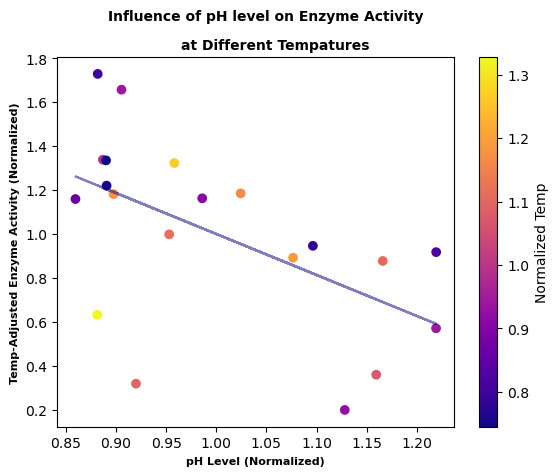

In [12]:
# graph 1 - scatter plot showing how ph level influences enzyme activity
from scipy.stats import linregress

plt.scatter(normalized_bio_data['Normalized pH Level'],
            normalized_bio_data['Normalized Temp-Adjusted Enzyme Activity'],
            c = normalized_bio_data['Normalized Temperature (C)'],
            cmap = 'plasma')


# Fit a general linear regression line
slope, intercept, r_value, p_value, std_err = linregress(normalized_bio_data['Normalized pH Level'], normalized_bio_data['Normalized Temp-Adjusted Enzyme Activity'])
regression_line = slope * normalized_bio_data['Normalized pH Level'] + intercept
# Plot the regression line
plt.plot(normalized_bio_data['Normalized pH Level'], regression_line, color='navy', label='Regression Line', alpha = 0.5)

# Set plot labels and title

plt.colorbar(label = 'Normalized Temp')
plt.suptitle('Influence of pH level on Enzyme Activity',fontsize = 10 ,fontweight = 'bold', x = 0.45)
plt.title('at Different Tempatures',fontsize = 10 ,fontweight = 'bold', x = 0.55)
plt.xlabel('pH Level (Normalized)', fontsize = 8,fontweight = 'bold')
plt.ylabel('Temp-Adjusted Enzyme Activity (Normalized)', fontsize = 8,fontweight = 'bold')

**Saving graph explenation**

In [13]:
text1 = 'This graph shows the relationship between the pH level of a sample and the Enzyme activity. \n We used the tempature adjusted Enzyme activity to understand the specific effect of the \n pH level. We can see in the results that while the tempature is all over \n the place the pH level has a general negative regression, meaning the \n Enzyme activity gets lower as the pH level increases. \n It is important to note this is not exact since we are using a very general linear regression line \n but it was added to help visual the general trend in the data.'

## Graph 2 - Bar Plot

Text(0, 0.5, 'pH Impact Score (Normalized)')

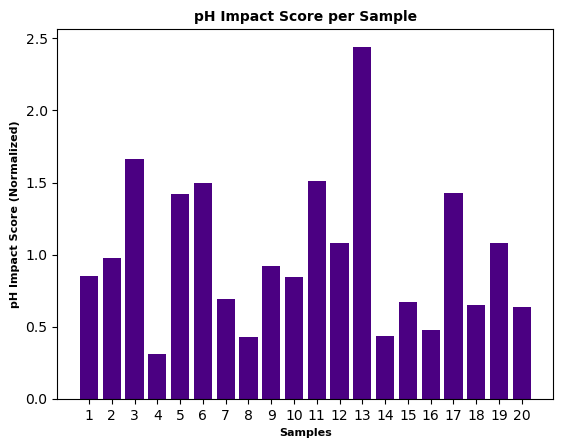

In [14]:
# graph 2 - bar chart ph impact score across samples

sample_nums = [sample.split()[1] for sample in normalized_bio_data['Sample ID']]


plt.bar(sample_nums, normalized_bio_data['Normalized pH Impact Score'], color ='indigo')

plt.title('pH Impact Score per Sample',fontsize = 10 ,fontweight = 'bold', x = 0.5)
plt.xlabel('Samples', fontsize = 8,fontweight = 'bold')
plt.ylabel('pH Impact Score (Normalized)', fontsize = 8,fontweight = 'bold')


**Saving graph explenation**

In [15]:
text2 = 'Here we see the pH impact score on each of the samples. \n We can see that there is a wide variation of effect while looking at the full graph. \n We can see that on the scope of the full experiemnt there are some samples that are highley effected by the \n pH level and some that are not.'

## Graph 3 - Line plot

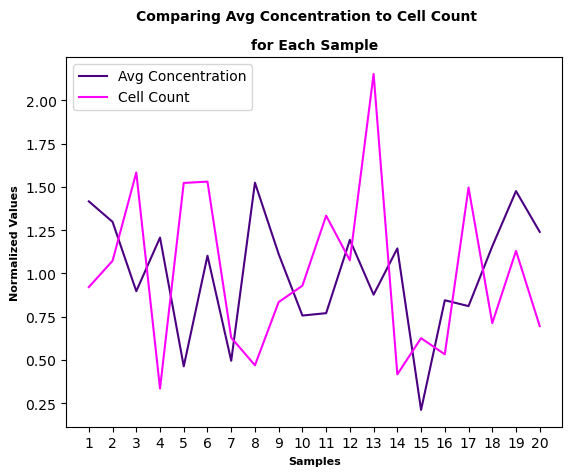

In [16]:
# plot 3 
sample_nums = [sample.split()[1] for sample in normalized_bio_data['Sample ID']]

plt.plot(sample_nums, normalized_bio_data['Normalized Average Concentration'], label = 'Avg Concentration',color = 'indigo')
plt.plot(sample_nums, normalized_bio_data['Normalized Cell Count (cells/ml)'], label = 'Cell Count ',color = 'magenta')
# Set plot labels and title
plt.suptitle('Comparing Avg Concentration to Cell Count', fontsize = 10,fontweight = 'bold', x =0.5)
plt.title('for Each Sample', fontsize = 10, fontweight = 'bold', x= 0.5)
plt.xlabel('Samples', fontsize = 8,fontweight = 'bold')
plt.ylabel('Normalized Values', fontsize = 8,fontweight = 'bold')
plt.legend(loc = 'upper left')


**Saving graph explenation**

In [17]:
text3 = 'In this graph we explore the differences in average concentartion and cell count in each sample.\n While comparing the two metrics we can see tht in most of the \n cases the two metrics act in opposite fashions.\n In most of our samples an icrease in the concentration from the previous \n example also shows a decrease in the cell count.'

# Saving files

In [18]:
texts = [text1,text2,text3]

## Creating pdf with graphs

In [19]:
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import linregress
import matplotlib.pyplot as plt
from pandas.plotting import table 

pdf_pages = PdfPages('Graphs.pdf')

# Graph 1: Scatter plot showing how pH level influences enzyme activity
plt.figure(figsize=(8, 13))
plt.subplot(2, 1, 1)
plt.scatter(normalized_bio_data['Normalized pH Level'],
            normalized_bio_data['Normalized Temp-Adjusted Enzyme Activity'],
            c=normalized_bio_data['Normalized Temperature (C)'],
            cmap='plasma')

slope, intercept, r_value, p_value, std_err = linregress(normalized_bio_data['Normalized pH Level'],
                                                        normalized_bio_data['Normalized Temp-Adjusted Enzyme Activity'])
regression_line = slope * normalized_bio_data['Normalized pH Level'] + intercept
plt.plot(normalized_bio_data['Normalized pH Level'], regression_line, color='navy', label='Regression Line', alpha=0.5)

plt.colorbar(label='Normalized Temp')
plt.suptitle('Influence of pH level on Enzyme Activity', fontsize=12, fontweight='bold', x = 0.5, y = 0.92)
plt.title('at Different Temperatures', fontsize=12, fontweight='bold', x=0.60, y = 1.03)
plt.xlabel('pH Level (Normalized)', fontsize=8, fontweight='bold')
plt.ylabel('Temp-Adjusted Enzyme Activity (Normalized)', fontsize=8, fontweight='bold')

text1 = texts[0]
plt.annotate(text1, xy=(0.5, -0.3), xycoords='axes fraction', ha='center', va='center')

pdf_pages.savefig()
plt.close()

# Graph 2: Bar chart ph impact score across samples
plt.figure(figsize=(8, 13))
plt.subplot(2, 1, 1)
sample_nums = [sample.split()[1] for sample in normalized_bio_data['Sample ID']]
plt.bar(sample_nums, normalized_bio_data['Normalized pH Impact Score'], color='indigo')

plt.title('pH Impact Score per Sample', fontsize=12, fontweight='bold', x=0.5, y = 1.03)
plt.xlabel('Samples', fontsize=8, fontweight='bold')
plt.ylabel('pH Impact Score (Normalized)', fontsize=8, fontweight='bold')

text2 = texts[1]
plt.annotate(text2, xy=(0.5, -0.3), xycoords='axes fraction', ha='center', va='center')

pdf_pages.savefig()
plt.close()

# Graph 3: Line chart comparing Avg Concentration to Cell Count
plt.figure(figsize=(8, 13))
plt.subplot(2, 1, 1)
plt.plot(sample_nums, normalized_bio_data['Normalized Average Concentration'], label='Avg Concentration', color='indigo')
plt.plot(sample_nums, normalized_bio_data['Normalized Cell Count (cells/ml)'], label='Cell Count', color='magenta')

plt.suptitle('Comparing Avg Concentration to Cell Count', fontsize=12, fontweight='bold', x=0.5,y = 0.92)
plt.title('for Each Sample', fontsize=12, fontweight='bold', x=0.5, y =1.03)
plt.xlabel('Samples', fontsize=8, fontweight='bold')
plt.ylabel('Normalized Values', fontsize=8, fontweight='bold')
plt.legend(loc='upper left')

text3 = texts[2]
plt.annotate(text3, xy=(0.5, -0.3), xycoords='axes fraction', ha='center', va='center')

pdf_pages.savefig()
plt.close()

# After all figures are created, close the PdfPages object to finalize the PDF file
pdf_pages.close()

## Exports data into excel file

In [20]:
with pd.ExcelWriter('Summary_Tables.xlsx') as writer:
    # Write each DataFrame to a different sheet
    normalized_bio_data.to_excel(writer, sheet_name='Normalized Data', index=False)
    bio_data.to_excel(writer, sheet_name='Original Data', index=False)